In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points

In [4]:
fid_theta = np.array([10.5, 2.25, 0.2, 0, 0, 0])
min_mass=6.5
mock = jsm_models.INIT_DATA(fid_theta, "../../../data/preliminary/updated_stats/new_stats/for_loop/1x/mock_1/mock_data.npy")
mock.get_stats(min_mass=min_mass)

In [5]:
width = 0.05
width2 = 0.03

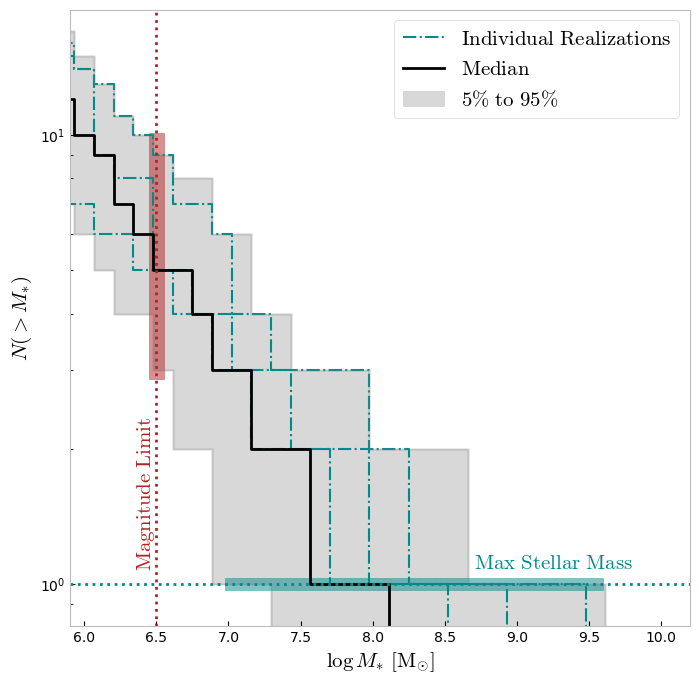

In [10]:
plt.figure(figsize=(8,8))

for i in mock.stat.CSMF_counts[np.random.randint(0,100, 2)]:
    plt.step(mock.stat.mass_bins,i, lw=1.5, ls="-.", color="darkcyan", where="mid")
plt.step(mock.stat.mass_bins, mock.stat.CSMF_counts[83], lw=1.5, color="darkcyan", ls="-.", label="$\mathrm{Individual}\ \mathrm{Realizations}$", where="mid")

# for i in range(100):
#     plt.plot(mass[i], Ngtr[i], color="grey", lw=0.5)
plt.step(mock.stat.mass_bins, mock.stat.quant[1], label="$\mathrm{Median}$", color="black", where="mid")
plt.step(mock.stat.mass_bins, mock.stat.quant[0], color="grey", where="mid", alpha=0.2)
plt.step(mock.stat.mass_bins, mock.stat.quant[2], color="grey", where="mid", alpha=0.2)
plt.fill_between(mock.stat.mass_bins, y1=mock.stat.quant[0], y2=mock.stat.quant[2], step="mid", color="grey", alpha=0.3, label="$\mathrm{5\%\ to\ 95\%}$")


plt.xlabel("$\log M_{*}\ [\mathrm{M}_{\odot}]$")
plt.ylabel("$N (> M_{*})$")
plt.yscale("log")
plt.xlim(5.9, 10.2)
plt.ylim(0, 19)

plt.axvline(6.5, ls=":", color="firebrick")
plt.axvspan(ymin=0.4, ymax=0.8, xmin=6.5-(width), xmax=6.5+(width), color="firebrick", alpha=0.5)
plt.text(6.35, 1.1, "$\mathrm{Magnitude\ Limit}$", rotation=90, color="firebrick", fontsize=15)

plt.axhline(1, ls=":", color="darkcyan")
plt.axhspan(ymin=1-width2, ymax=1+width2, xmin=0.25, xmax=0.86, color="darkcyan", alpha=0.5)
plt.text(8.7, 1.08, "$\mathrm{Max\ Stellar\ Mass}$", color="darkcyan", fontsize=15)
plt.legend()
plt.savefig("../../../paper_1/figures/intro/SMF.pdf", bbox_inches='tight')

plt.show()